In [1]:
# -*- coding:utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import warnings
from sklearn import datasets
%matplotlib inline
warnings.filterwarnings(action='ignore') #不输出警告
np.set_printoptions(suppress=True)

In [2]:
data = pd.read_csv('iris.data',header=None)
iris_types = data[4].unique()
for i,type in enumerate(iris_types):
    data.set_value(data[4]==type,4,i)  
"""
set_value(index, col, value, takeable=False)
index : row label
col : column label
value : scalar value
takeable : interpret the index/col as indexers, default False
returns:
frame : DataFrame
If label pair is contained, will be reference to calling DataFrame, otherwise a new object
"""

'\nset_value(index, col, value, takeable=False)\nindex : row label\ncol : column label\nvalue : scalar value\ntakeable : interpret the index/col as indexers, default False\nreturns:\nframe : DataFrame\nIf label pair is contained, will be reference to calling DataFrame, otherwise a new object\n'

In [3]:
x,y = np.split(data,(4,),axis=1)
x = x.iloc[:,[0,1]]  #只取前两列，方便画图
#train_test_split(x, y, train_size=0.8)

In [4]:
gnb = Pipeline([
        ('sc',StandardScaler()),
        ('clf',GaussianNB())
    ])

In [5]:
gnb.fit(x, y)

Pipeline(memory=None,
     steps=[('sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', GaussianNB(priors=None))])

In [6]:
x.iloc[:,0].min()

4.2999999999999998

In [7]:
# 画图
N, M = 500, 500     # 横纵各采样多少个值
x1_min, x1_max = x.iloc[:,0].min(), x.iloc[:,0].max()   # 第0列的范围
x2_min, x2_max = x.iloc[:,1].min(), x.iloc[:,1].max()   # 第1列的范围
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)                    # 生成网格采样点
x_test = np.stack((x1.flat, x2.flat), axis=1)   # 测试点

In [8]:
x_test.shape

(250000, 2)

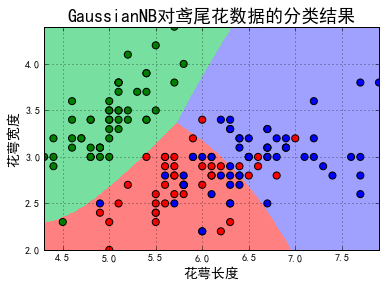

In [9]:
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False
cm_light = mpl.colors.ListedColormap(['#77E0A0', '#FF8080', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
y_hat = gnb.predict(x_test)                  # 预测值
y_hat = y_hat.reshape(x1.shape)                 # 使之与输入的形状相同
plt.figure(facecolor='w')
plt.pcolormesh(x1, x2, y_hat, cmap=cm_light)     # 预测值的显示
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, edgecolors='k', s=50, cmap=cm_dark)    # 样本的显示
plt.xlabel(u'花萼长度', fontsize=14)
plt.ylabel(u'花萼宽度', fontsize=14)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'GaussianNB对鸢尾花数据的分类结果', fontsize=18)
plt.grid(True)
plt.show()

In [10]:
iris = datasets.load_iris()

In [11]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
iris.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [13]:
iris.data.shape

(150, 4)

In [14]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [15]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
clf = GaussianNB() #classification
clf.fit(iris.data,iris.target)

GaussianNB(priors=None)

In [17]:
clf.predict(iris.data[0].reshape(1,-1))

array([0])

In [18]:
clf_1 = GaussianNB()

In [19]:
clf_1.fit(x,y)

GaussianNB(priors=None)

In [20]:
y_hat_x = clf_1.predict(x)

In [21]:
np.mean(y_hat_x==iris.target)

0.78000000000000003

In [22]:
y_hat_x

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  2.,
        2.,  1.,  2.,  1.,  2.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,
        2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  2.,  1.,
        2.,  2.,  1.,  2.,  2.,  2.,  2.,  1.,  2.,  1.,  1.,  2.,  2.,
        2.,  2.,  1.,  2.,  1.,  2.,  1.,  2.,  2.,  1.,  1.,  1.,  2.,
        2.,  2.,  1.,  1.,  1.,  2.,  2.,  2.,  1.,  2.,  2.,  2.,  1.,
        2.,  2.,  2.,  1.,  2.,  2.,  1.])

In [23]:
gnb_hat = gnb.predict(x)

In [25]:
np.mean(gnb_hat == iris.target)

0.78000000000000003